In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sqlite3
from scipy.stats import ttest_ind  
import scipy.stats as stats

In [2]:
# Loading the Dataset
conn = sqlite3.connect("inventory.db")
#Fetching Vendor sales summary
df = pd.read_sql_query(""" Select * from VendorSalesSummary""" , conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,volume,TotalPurchaseQuantity,TotalPurchaseDollars,Total_sales_quantity,Total_Sales_Dollars,Total_Sales_Price,Total_Excise_tax,Freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


**Exploratory Data Analysis**

* In the previous step, we reviewed the different tables in the database to identify key variables, understand their relationships, and decide which ones should be included in the final analysis.

* During this EDA phase, we analyze the consolidated dataset to gain insights into the distribution of each column. This helps in identifying patterns, detecting anomalies, and validating data quality before moving on to further analysis.


In [3]:
#Summary statsistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
Actual_Price,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
Total_sales_quantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
Total_Sales_Dollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
Total_Sales_Price,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


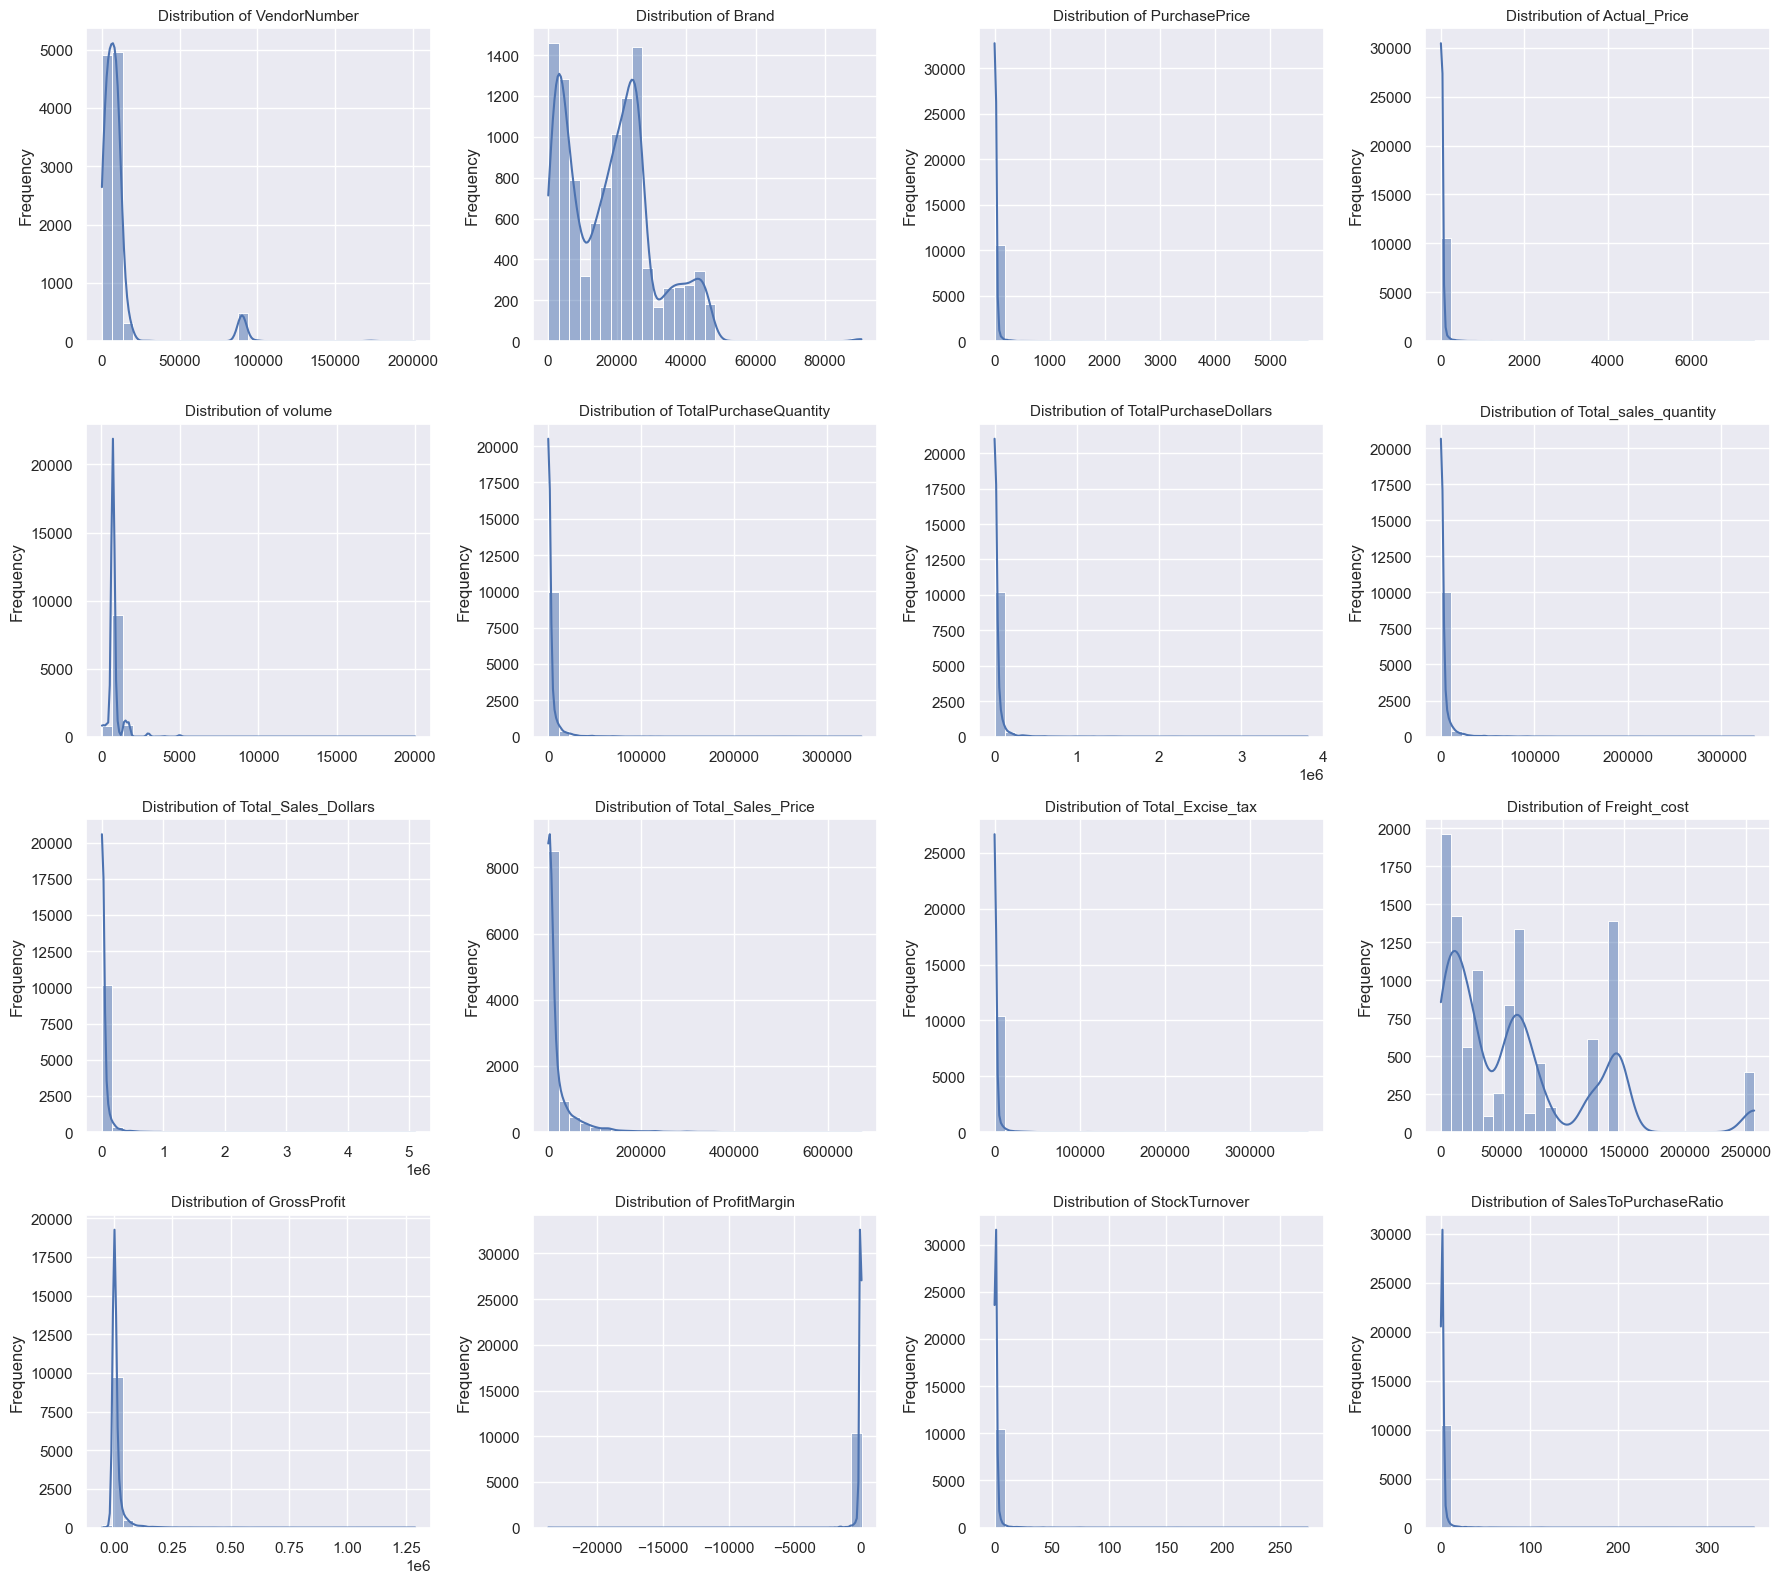

In [4]:
# 🔍 Automated Distribution Analysis for Numerical Features

# Select numerical columns dynamically
numerical_features = df.select_dtypes(include=np.number).columns

# Set a modern visual theme
sns.set_theme(style="darkgrid", context="notebook")

# Create adaptive grid layout
n_cols = 4
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 4 * n_rows))

for idx, feature in enumerate(numerical_features, start=1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(
        data=df,
        x=feature,
        bins=30,
        kde=True,
        edgecolor="white"
    )
    plt.title(f"Distribution of {feature}", fontsize=11)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

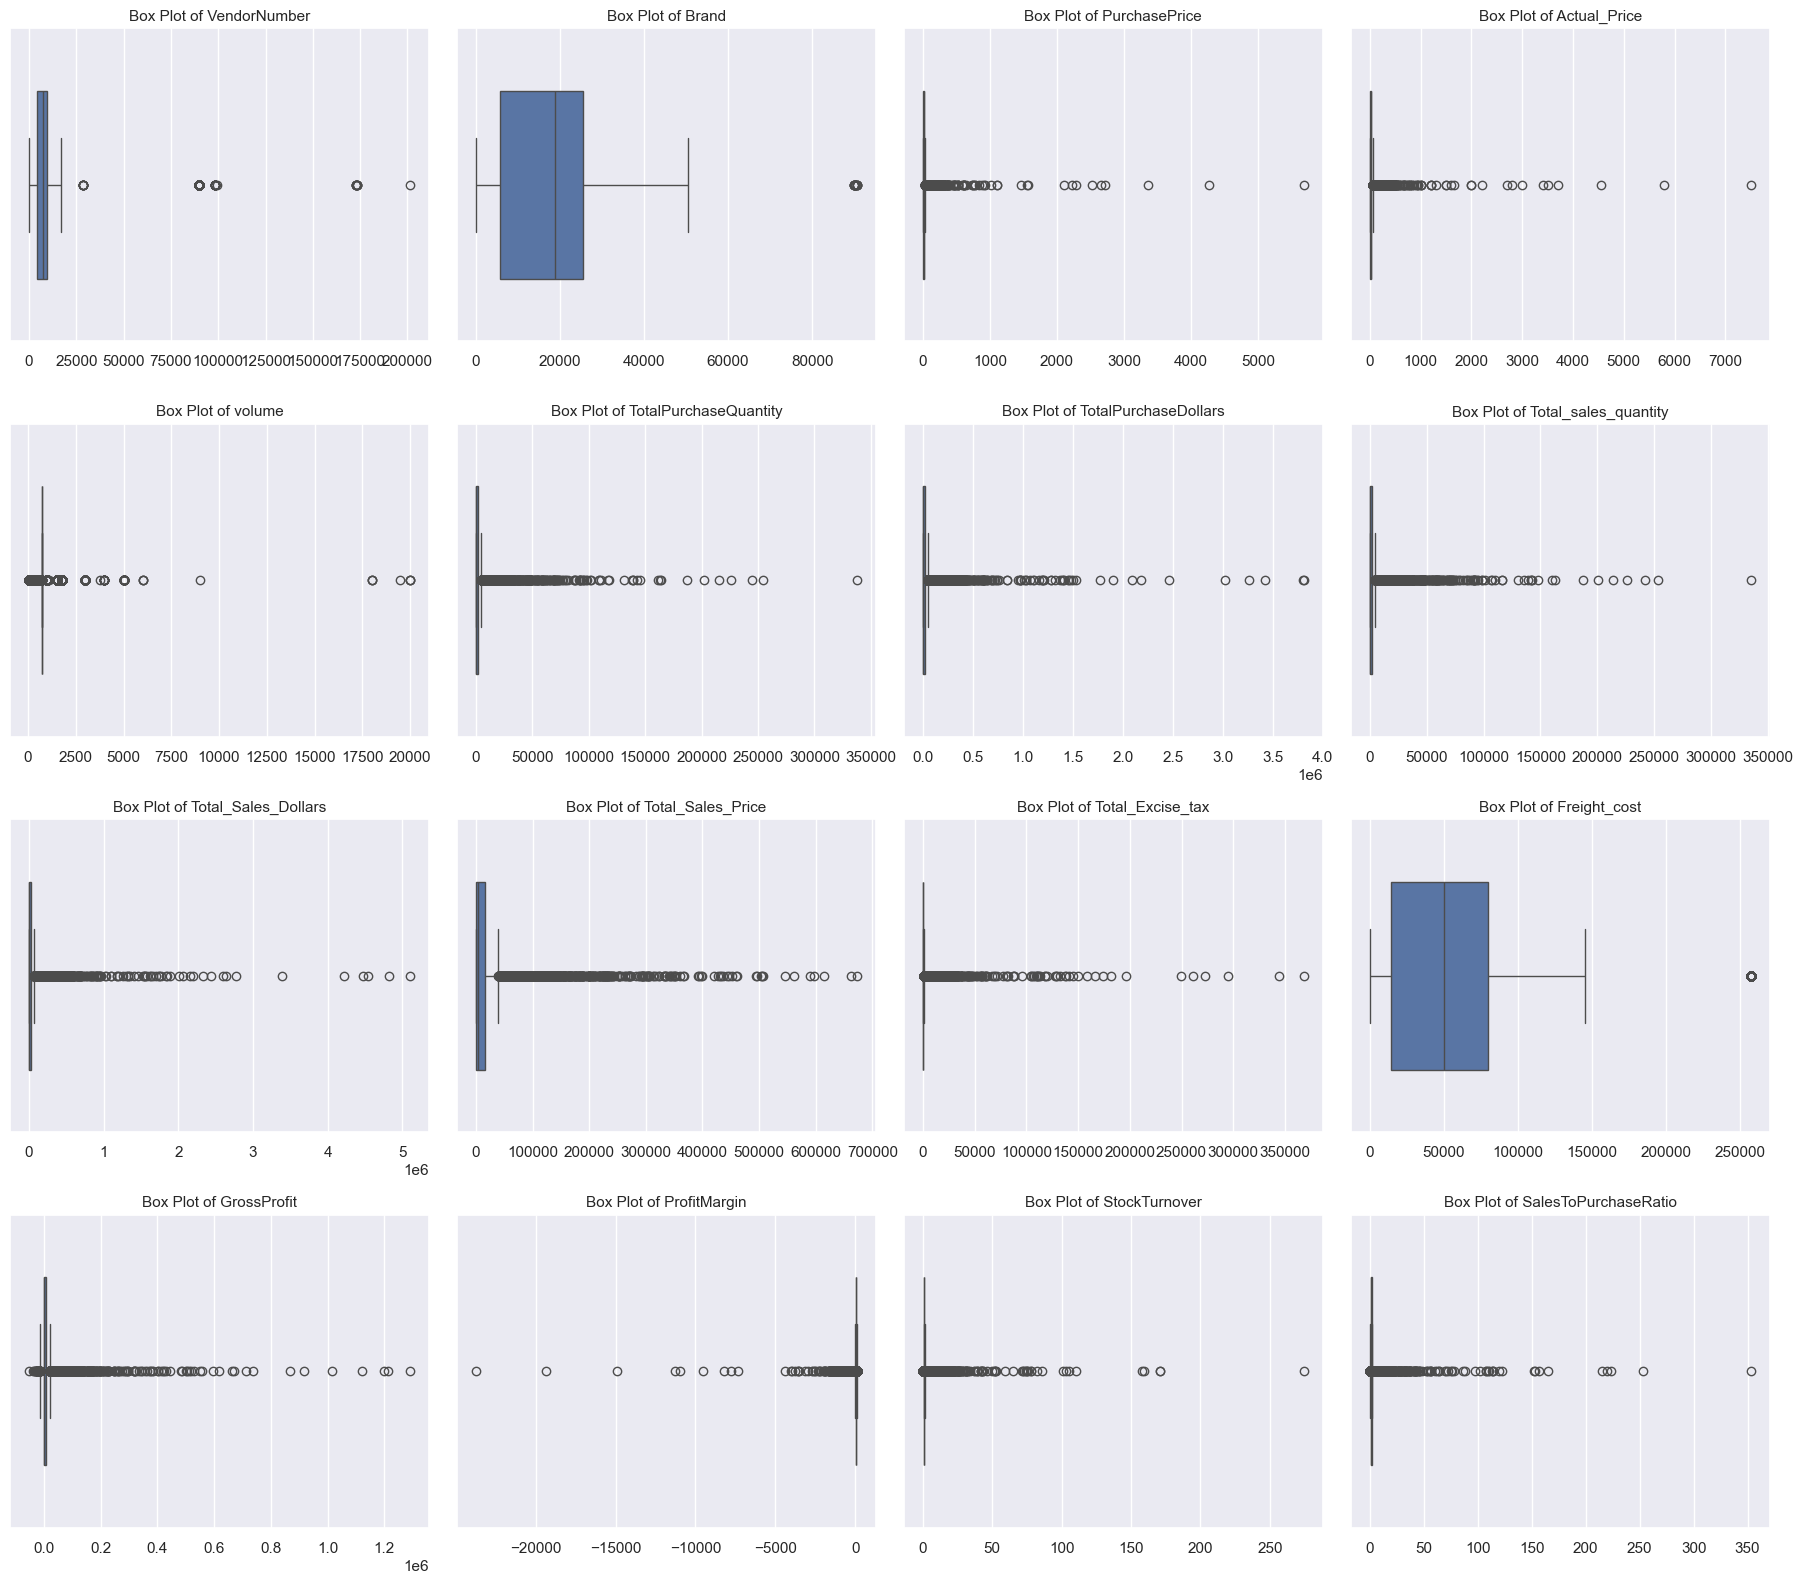

In [5]:
# 📦 Automated Box Plot Analysis for Numerical Features

# Select numerical columns dynamically
numerical_features = df.select_dtypes(include=np.number).columns

# Set a modern visualization theme
sns.set_theme(style="darkgrid", context="notebook")

# Create adaptive grid layout
n_cols = 4
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 4 * n_rows))

for idx, feature in enumerate(numerical_features, start=1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(
        data=df,
        x=feature,
        color="#4C72B0",
        width=0.6
    )
    plt.title(f"Box Plot of {feature}", fontsize=11)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

# Summary Statistics – Key Insights
## Negative and Zero Values

Gross Profit: The minimum value of –52,002.78 indicates that certain products or transactions resulted in losses. This may be due to high procurement costs, heavy discounting, or pricing below the purchase cost.

Profit Margin: The presence of negative infinity (–∞) values suggests scenarios where revenue is zero or lower than the associated costs, highlighting unprofitable sales instances.

Total Sales Quantity and Sales Amount: Minimum values of 0 indicate that some items were purchased but never sold. These products may represent slow-moving, inactive, or obsolete inventory.

## Outliers Indicated by High Variability

Purchase Price and Actual Selling Price: The maximum values (5,681.81 and 7,499.99) are significantly higher than their respective averages (24.39 and 35.64), indicating the presence of high-value or premium products.

Freight Cost: The wide range from 0.09 to 257,032.07 reflects substantial variability in logistics expenses, which may be driven by bulk shipments, long-distance transportation, or operational inefficiencies.

Stock Turnover: Values range from 0 to 274.5, showing that some products sell very quickly while others remain in inventory for extended periods. A turnover value greater than 1 suggests that sales may be fulfilled using previously held stock rather than newly purchased inventory.

In [6]:
# Filter the Data by removing Inconsistencies
df = pd.read_sql_query(""" select * from Vendorsalessummary 
where GrossProfit >0 and
ProfitMargin > 0 
and Total_Sales_Dollars > 0 """ , conn )


In [7]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,volume,TotalPurchaseQuantity,TotalPurchaseDollars,Total_sales_quantity,Total_Sales_Dollars,Total_Sales_Price,Total_Excise_tax,Freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


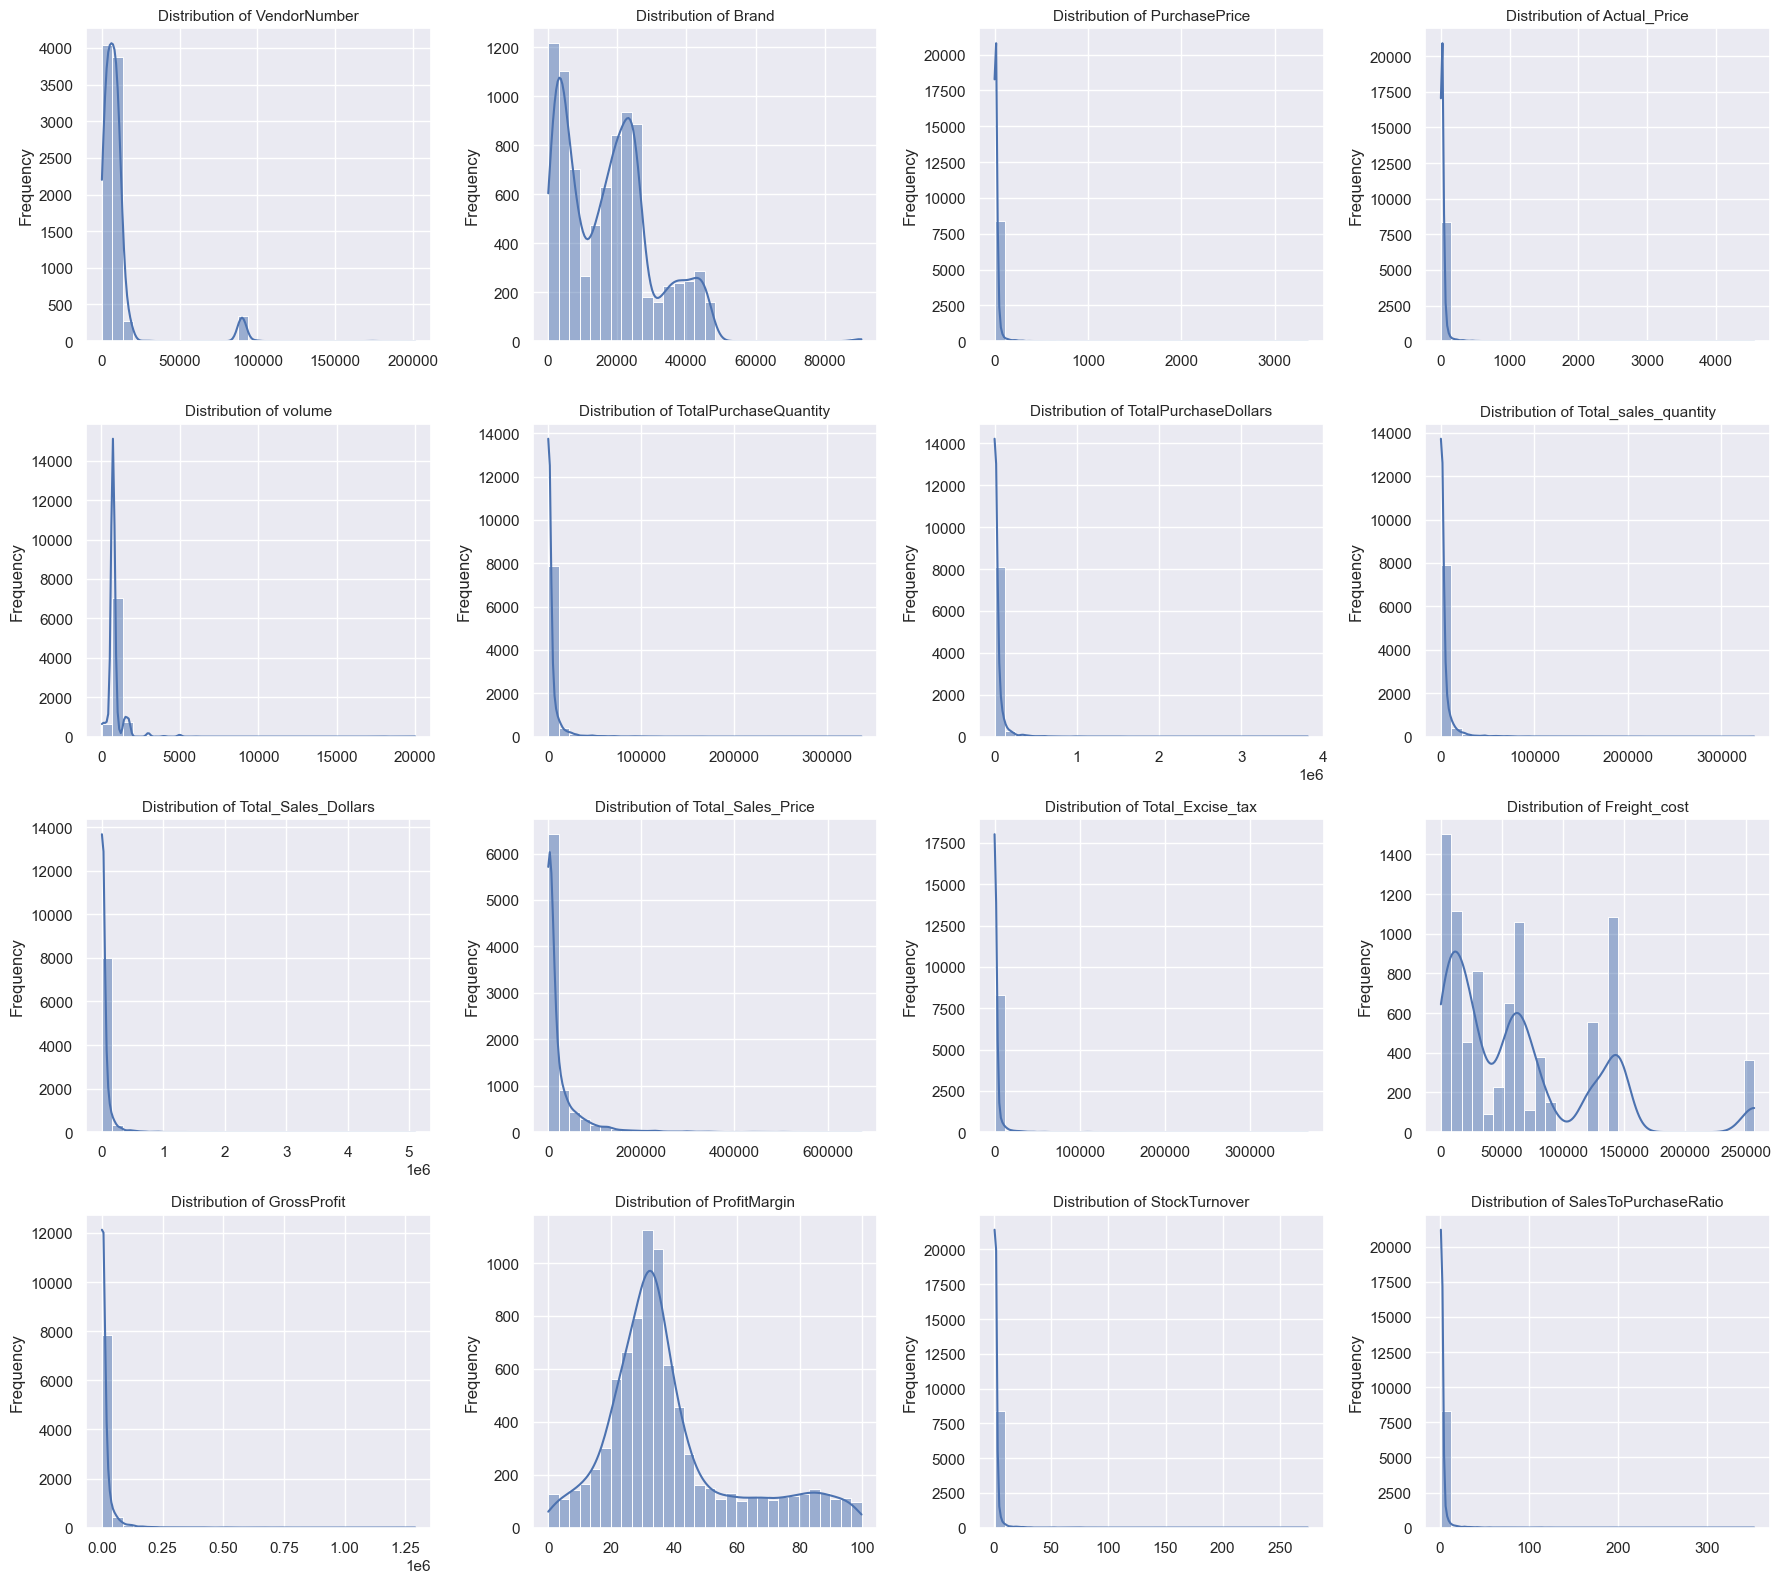

In [8]:
# 🔍 Automated Distribution Analysis for Numerical Features

# Select numerical columns dynamically
numerical_features = df.select_dtypes(include=np.number).columns

# Set a modern visual theme
sns.set_theme(style="darkgrid", context="notebook")

# Create adaptive grid layout
n_cols = 4
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 4 * n_rows))

for idx, feature in enumerate(numerical_features, start=1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(
        data=df,
        x=feature,
        bins=30,
        kde=True,
        edgecolor="white"
    )
    plt.title(f"Distribution of {feature}", fontsize=11)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

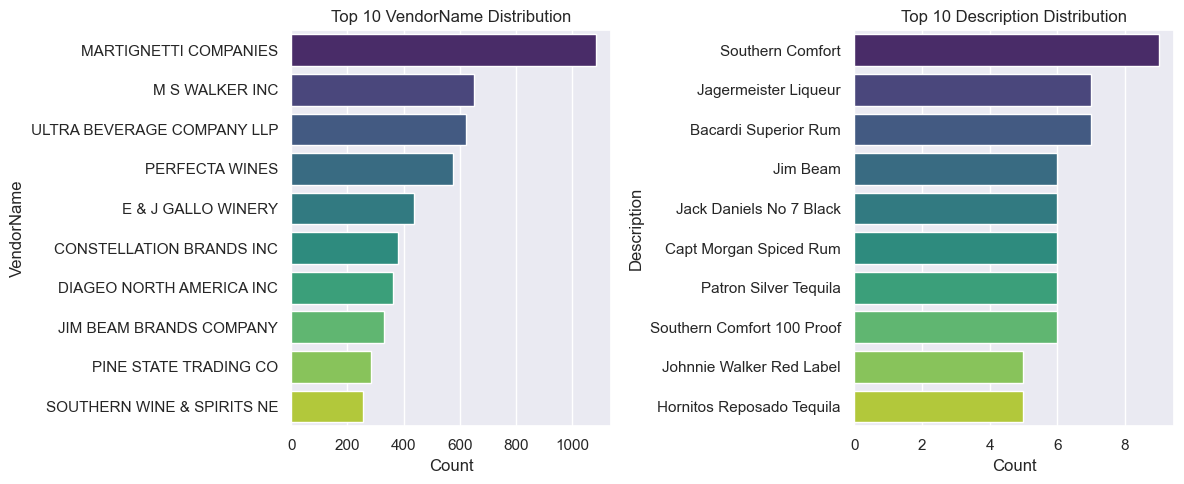

In [9]:
# Define categorical columns
categorical_features = ["VendorName", "Description"]

# Set a modern visualization theme
sns.set_theme(style="darkgrid", context="notebook")

# Create subplot layout dynamically
n_cols = len(categorical_features)
plt.figure(figsize=(6 * n_cols, 5))

for idx, feature in enumerate(categorical_features, start=1):
    plt.subplot(1, n_cols, idx)
    
    # Plot Top 10 most frequent categories
    top_categories = df[feature].value_counts().head(10).index
    sns.countplot(
        data=df,
        y=feature,
        order=top_categories,
        palette="viridis"
    )
    
    plt.title(f"Top 10 {feature} Distribution", fontsize=12)
    plt.xlabel("Count")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


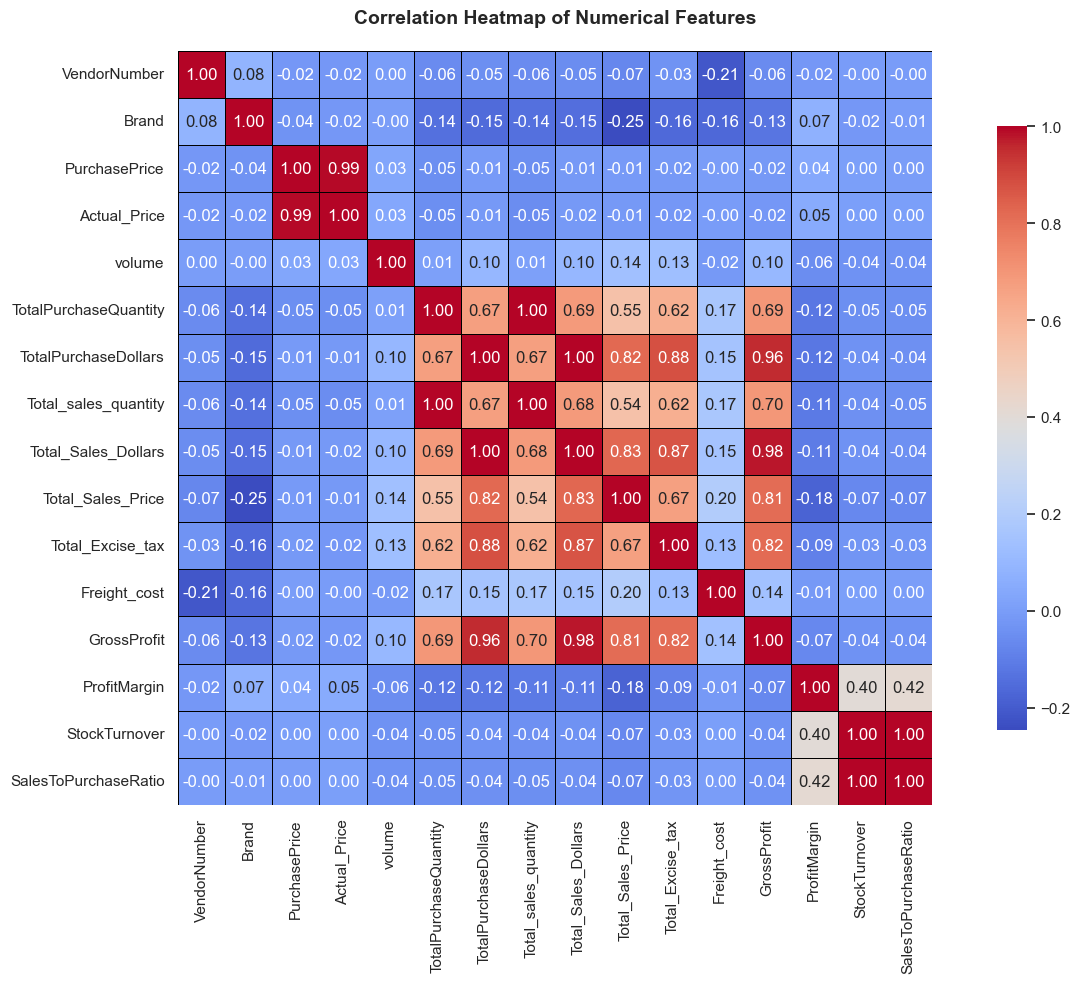

In [10]:
# Select numerical columns
numerical_features = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix = numerical_features.corr()

# Set modern visualization theme
sns.set_theme(style="dark", context="notebook")

# Create figure
plt.figure(figsize=(14, 10))

# Plot heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="black",
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title(
    "Correlation Heatmap of Numerical Features",
    fontsize=14,
    fontweight="bold",
    pad=20
)

plt.tight_layout()
plt.show()


# Correlation Insights

## Purchase Price vs Sales & Profit:
Purchase Price shows a very weak correlation with both Total Sales Dollars (–0.012) and Gross Profit (–0.016). This indicates that variations in purchase price do not have a significant direct impact on overall sales revenue or profitability.

## Purchase Quantity vs Sales Quantity:
There is a very strong positive correlation (0.999) between total purchase quantity and total sales quantity. This confirms efficient inventory movement, where most purchased stock is successfully sold.

## Profit Margin vs Sales Price:
A moderate negative correlation (–0.179) exists between profit margin and total sales price. This suggests that as selling prices increase, profit margins tend to decrease, possibly due to competitive pricing strategies or higher associated costs.

## Stock Turnover vs Profitability:
Stock Turnover shows weak negative correlations with Gross Profit (–0.038) and Profit Margin (–0.055). This implies that faster inventory turnover does not necessarily lead to higher profitability and may be driven by lower-margin or discounted sales.

# Data Analysis

## Identify Brands thats needs Promotional and Pricing Adjustment which exhibits lower sales performance and higher profit

In [11]:
brand_performance = df.groupby("Description").agg({"Total_Sales_Dollars" : "sum" , "ProfitMargin" : "mean"}).reset_index()

In [12]:
low_sales_threshold = brand_performance["Total_Sales_Dollars"].quantile(0.15)
high_margin_threshold = brand_performance["ProfitMargin"].quantile(0.85)

In [13]:
low_sales_threshold

np.float64(560.299)

In [14]:
high_margin_threshold

np.float64(64.97017552750113)

In [15]:
# Filter brands meeting the criteria
target_brands = brand_performance[
    (brand_performance["Total_Sales_Dollars"] <= low_sales_threshold) &
    (brand_performance["ProfitMargin"] >= high_margin_threshold)
]

# Display results
print("Brands with Low Sales but High Profit Margins:")
display(
    target_brands
    .sort_values(by="Total_Sales_Dollars", ascending=True)
)

Brands with Low Sales but High Profit Margins:


,Description,Total_Sales_Dollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [16]:
brand_performance = brand_performance[brand_performance["Total_Sales_Dollars"] < 10000] #for better visualisation

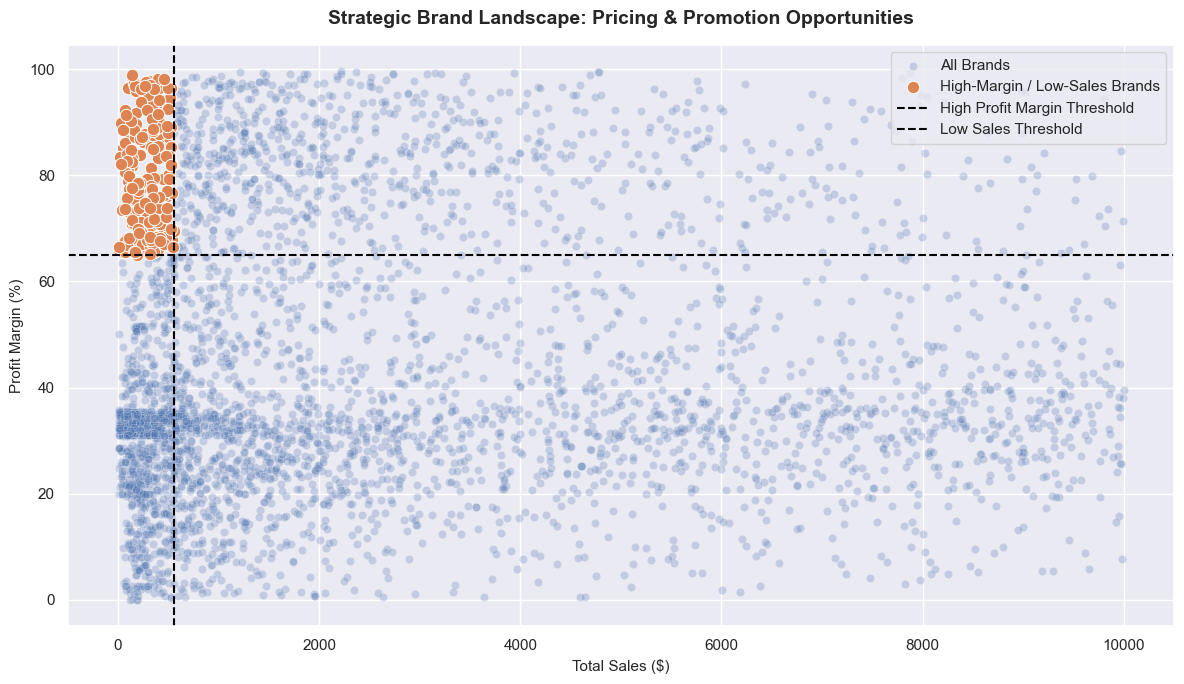

In [17]:
sns.set_theme(style="darkgrid", context="notebook")

# Initialize canvas
plt.figure(figsize=(12, 7))

# Plot all brands (background context)
sns.scatterplot(
    data=brand_performance,
    x="Total_Sales_Dollars",
    y="ProfitMargin",
    color="#4C72B0",
    alpha=0.25,
    label="All Brands"
)

# Highlight target brands (low sales, high margin)
sns.scatterplot(
    data=target_brands,
    x="Total_Sales_Dollars",
    y="ProfitMargin",
    color="#DD8452",
    s=80,
    label="High-Margin / Low-Sales Brands"
)

# Strategic threshold lines
plt.axhline(
    y=high_margin_threshold,
    linestyle="--",
    linewidth=1.5,
    color="black",
    label="High Profit Margin Threshold"
)

plt.axvline(
    x=low_sales_threshold,
    linestyle="--",
    linewidth=1.5,
    color="black",
    label="Low Sales Threshold"
)

# Labels & title
plt.xlabel("Total Sales ($)", fontsize=11)
plt.ylabel("Profit Margin (%)", fontsize=11)
plt.title(
    "Strategic Brand Landscape: Pricing & Promotion Opportunities",
    fontsize=14,
    fontweight="bold",
    pad=15
)

plt.legend()
plt.tight_layout()
plt.show()

In [18]:
def format_dollars(value):
    """
    Formats a numeric dollar value into a human-readable string.
    Examples:
    1500000 -> 1.50M
    4500    -> 4.50K
    900     -> 900
    """
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return f"{value:.0f}"

In [19]:
# 🚀 Identify top-performing vendors and brands based on total sales

# Top 10 Vendors by Total Sales
top_vendors = (
    df.groupby("VendorName", as_index=False)["Total_Sales_Dollars"]
      .sum()
      .sort_values(by="Total_Sales_Dollars", ascending=False)
      .head(10)
)

# Top 10 Brands by Total Sales
top_brands = (
    df.groupby("Description", as_index=False)["Total_Sales_Dollars"]
      .sum()
      .sort_values(by="Total_Sales_Dollars", ascending=False)
      .head(10)
)

# Display results
display(top_vendors)
display(top_brands)

,VendorName,Total_Sales_Dollars
25,DIAGEO NORTH AMERICA INC,67990099.42
57,MARTIGNETTI COMPANIES,39330359.36
68,PERNOD RICARD USA,32063196.19
46,JIM BEAM BRANDS COMPANY,31423020.46
6,BACARDI USA INC,24854817.14
20,CONSTELLATION BRANDS INC,24218745.65
30,E & J GALLO WINERY,18399899.46
11,BROWN-FORMAN CORP,18247230.65
106,ULTRA BEVERAGE COMPANY LLP,16502544.31
53,M S WALKER INC,14706458.51


,Description,Total_Sales_Dollars
3771,Jack Daniels No 7 Black,7964746.76
7114,Tito's Handmade Vodka,7399657.58
3402,Grey Goose Vodka,7209608.06
1272,Capt Morgan Spiced Rum,6356320.62
86,Absolut 80 Proof,6244752.03
3850,Jameson Irish Whiskey,5715759.69
4101,Ketel One Vodka,5070083.56
478,Baileys Irish Cream,4150122.07
4019,Kahlua,3604858.66
6846,Tanqueray,3456697.90


In [20]:
top_brands["FormattedSales"] = top_brands["Total_Sales_Dollars"].apply(format_dollars)

In [21]:
top_brands

,Description,Total_Sales_Dollars,FormattedSales
3771,Jack Daniels No 7 Black,7964746.76,7.96M
7114,Tito's Handmade Vodka,7399657.58,7.40M
3402,Grey Goose Vodka,7209608.06,7.21M
1272,Capt Morgan Spiced Rum,6356320.62,6.36M
86,Absolut 80 Proof,6244752.03,6.24M
3850,Jameson Irish Whiskey,5715759.69,5.72M
4101,Ketel One Vodka,5070083.56,5.07M
478,Baileys Irish Cream,4150122.07,4.15M
4019,Kahlua,3604858.66,3.60M
6846,Tanqueray,3456697.90,3.46M


In [22]:
top_vendors["FormattedSales"] = top_vendors["Total_Sales_Dollars"].apply(format_dollars)

In [23]:
top_vendors

,VendorName,Total_Sales_Dollars,FormattedSales
25,DIAGEO NORTH AMERICA INC,67990099.42,67.99M
57,MARTIGNETTI COMPANIES,39330359.36,39.33M
68,PERNOD RICARD USA,32063196.19,32.06M
46,JIM BEAM BRANDS COMPANY,31423020.46,31.42M
6,BACARDI USA INC,24854817.14,24.85M
20,CONSTELLATION BRANDS INC,24218745.65,24.22M
30,E & J GALLO WINERY,18399899.46,18.40M
11,BROWN-FORMAN CORP,18247230.65,18.25M
106,ULTRA BEVERAGE COMPANY LLP,16502544.31,16.50M
53,M S WALKER INC,14706458.51,14.71M


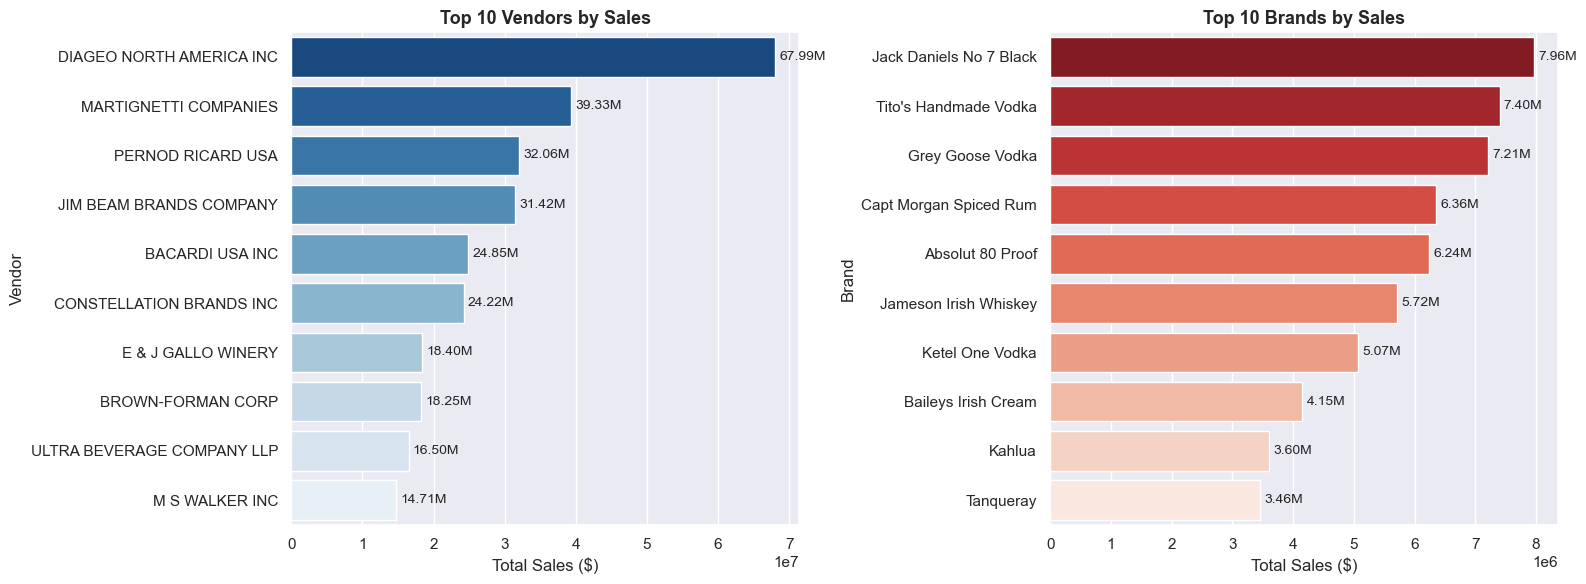

In [24]:
sns.set_theme(style="darkgrid", context="notebook")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# =======================
# Top Vendors Plot
# =======================
sns.barplot(
    ax=axes[0],
    data=top_vendors,
    y="VendorName",
    x="Total_Sales_Dollars",
    palette="Blues_r"
)

axes[0].set_title("Top 10 Vendors by Sales", fontsize=13, fontweight="bold")
axes[0].set_xlabel("Total Sales ($)")
axes[0].set_ylabel("Vendor")

# Annotate values
for container in axes[0].containers:
    axes[0].bar_label(
        container,
        labels=[format_dollars(v) for v in container.datavalues],
        padding=3,
        fontsize=10
    )

# =======================
# Top Brands Plot
# =======================
sns.barplot(
    ax=axes[1],
    data=top_brands,
    y="Description",
    x="Total_Sales_Dollars",
    palette="Reds_r"
)

axes[1].set_title("Top 10 Brands by Sales", fontsize=13, fontweight="bold")
axes[1].set_xlabel("Total Sales ($)")
axes[1].set_ylabel("Brand")

# Annotate values
for container in axes[1].containers:
    axes[1].bar_label(
        container,
        labels=[format_dollars(v) for v in container.datavalues],
        padding=3,
        fontsize=10
    )

plt.tight_layout()
plt.show()


# Which vendor contribute the most to total purchase dollar

In [25]:
vendor_performance = (
    df.groupby("VendorName")
      .agg({
          "TotalPurchaseDollars": "sum",
          "Total_Sales_Dollars": "sum",
          "GrossProfit": "sum"
      })
      .reset_index()
)

In [26]:
vendor_performance['PurchaseContribution%'] = (
    vendor_performance['TotalPurchaseDollars'] /
    vendor_performance['TotalPurchaseDollars'].sum()
) * 100


In [27]:
vendor_performance['PurchaseContribution%'] = vendor_performance['PurchaseContribution%'].round(2)

vendor_performance = vendor_performance.sort_values(
    'PurchaseContribution%', ascending=False
)

In [28]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10).copy()

top_vendors['Total_Sales_Dollars'] = top_vendors['Total_Sales_Dollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

top_vendors

,VendorName,TotalPurchaseDollars,Total_Sales_Dollars,GrossProfit,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,67.99M,17.89M,16.30
57,MARTIGNETTI COMPANIES,25.50M,39.33M,13.83M,8.30
68,PERNOD RICARD USA,23.85M,32.06M,8.21M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,31.42M,7.93M,7.64
6,BACARDI USA INC,17.43M,24.85M,7.42M,5.67
20,CONSTELLATION BRANDS INC,15.27M,24.22M,8.95M,4.97
11,BROWN-FORMAN CORP,13.24M,18.25M,5.01M,4.31
30,E & J GALLO WINERY,12.07M,18.40M,6.33M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,16.50M,5.34M,3.63
53,M S WALKER INC,9.76M,14.71M,4.94M,3.18


In [29]:
top_vendors["CumulativePerformance%"] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,Total_Sales_Dollars,GrossProfit,PurchaseContribution%,CumulativePerformance%
25,DIAGEO NORTH AMERICA INC,50.10M,67.99M,17.89M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,39.33M,13.83M,8.30,24.60
68,PERNOD RICARD USA,23.85M,32.06M,8.21M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,31.42M,7.93M,7.64,40.00
6,BACARDI USA INC,17.43M,24.85M,7.42M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,24.22M,8.95M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,18.25M,5.01M,4.31,54.95
30,E & J GALLO WINERY,12.07M,18.40M,6.33M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,16.50M,5.34M,3.63,62.51
53,M S WALKER INC,9.76M,14.71M,4.94M,3.18,65.69


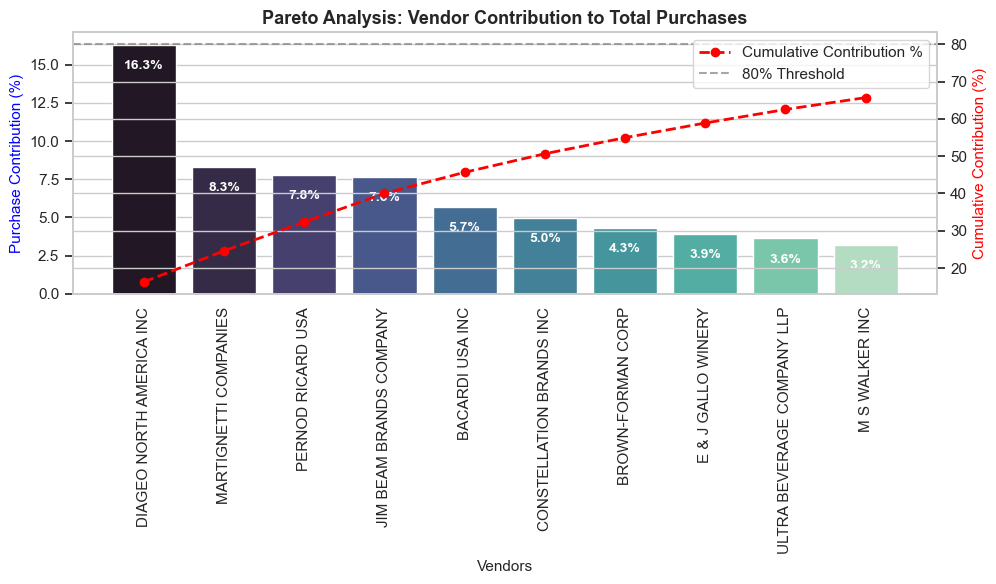

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style for a modern look
sns.set_theme(style="whitegrid")

# Create figure and primary axis
fig, ax_bar = plt.subplots(figsize=(10, 6))

# --- Bar Plot: Purchase Contribution (%) ---
sns.barplot(
    data=top_vendors,
    x="VendorName",
    y="PurchaseContribution%",
    palette="mako",
    ax=ax_bar
)

# Add percentage labels inside bars
for vendor, value in zip(top_vendors["VendorName"], top_vendors["PurchaseContribution%"]):
    ax_bar.text(
        vendor,
        value - 1,
        f"{value:.1f}%",
        ha="center",
        va="top",
        fontsize=10,
        color="white",
        fontweight="bold"
    )

# --- Line Plot: Cumulative Contribution (%) ---
ax_line = ax_bar.twinx()
ax_line.plot(
    top_vendors["VendorName"],
    top_vendors["CumulativePerformance%"],
    color="red",
    marker="o",
    linestyle="--",
    linewidth=2,
    label="Cumulative Contribution %"
)

# 80/20 reference line
ax_line.axhline(
    y=80,
    color="gray",
    linestyle="dashed",
    alpha=0.7,
    label="80% Threshold"
)

# Axis labels
ax_bar.set_xlabel("Vendors", fontsize=11)
ax_bar.set_ylabel("Purchase Contribution (%)", color="blue", fontsize=11)
ax_line.set_ylabel("Cumulative Contribution (%)", color="red", fontsize=11)

# Title
ax_bar.set_title(
    "Pareto Analysis: Vendor Contribution to Total Purchases",
    fontsize=13,
    fontweight="bold"
)

# Rotate x-axis labels
ax_bar.tick_params(axis="x", rotation=90)

# Legend
ax_line.legend(loc="upper right")

# Layout adjustment
plt.tight_layout()
plt.show()


# How much of the total procurement depended upon the top vendors?

In [31]:
print(
    f"Total purchases contribution of top 10 vendors is "
    f"{top_vendors['PurchaseContribution%'].sum():.2f}%"
)


Total purchases contribution of top 10 vendors is 65.69%


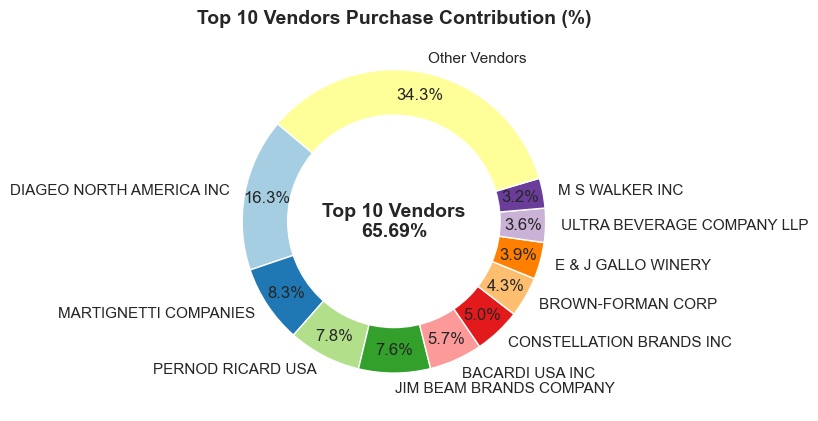

In [32]:
# Extract data from DataFrame
vendors = top_vendors["VendorName"].tolist()
purchase_contributions = top_vendors["PurchaseContribution%"].tolist()

# Calculate total & remaining contribution
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors"
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Create Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct="%1.1f%%",
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Donut effect (white center)
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
ax.add_artist(centre_circle)

# Center text annotation
ax.text(
    0,
    0,
    f"Top 10 Vendors\n{total_contribution:.2f}%",
    ha="center",
    va="center",
    fontsize=14,
    fontweight="bold"
)

# Title
ax.set_title(
    "Top 10 Vendors Purchase Contribution (%)",
    fontsize=14,
    fontweight="bold"
)

plt.tight_layout()
plt.show()

# Does purchasing in Bulk reduces the Unit Price and what is the optimal volume for cost saving?

In [33]:
df["Unit_Purchase_Price"] = (
    df["TotalPurchaseDollars"] / df["TotalPurchaseQuantity"].replace(0, pd.NA)
).round(2)


In [34]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,volume,TotalPurchaseQuantity,TotalPurchaseDollars,Total_sales_quantity,Total_Sales_Dollars,Total_Sales_Price,Total_Excise_tax,Freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,Unit_Purchase_Price
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [35]:
df["Order_Size"] = pd.qcut(
    df["TotalPurchaseQuantity"],
    q=3,
    labels=["Small", "Medium", "Large"]
)


In [36]:
df.groupby("Order_Size")["Unit_Purchase_Price"].mean()

Order_Size
Small     39.068186
Medium    15.486414
Large     10.777625
Name: Unit_Purchase_Price, dtype: float64

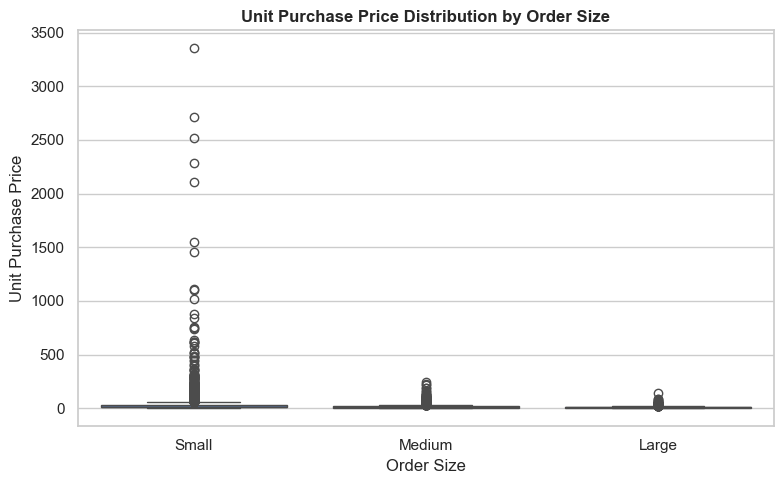

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set clean theme
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df,
    x="Order_Size",
    y="Unit_Purchase_Price"
)

plt.title("Unit Purchase Price Distribution by Order Size", fontsize=12, fontweight="bold")
plt.xlabel("Order Size")
plt.ylabel("Unit Purchase Price")

plt.tight_layout()
plt.show()


Vendors placing large-volume orders achieve the lowest unit purchase price (~$10.78 per unit), which can translate into higher margins when inventory is managed efficiently.

The unit cost gap between small and large orders is significant, with an approximate 72% reduction in per-unit price for bulk purchases.

This pattern indicates that bulk pricing strategies are effective, incentivizing higher order volumes and driving greater overall sales, even though the per-unit revenue is lower.

# Which vendor have low inventory turnover , indicating excess stock and slow-moving products

In [38]:
df[df["StockTurnover"]<1].groupby("VendorName")["StockTurnover"].mean().sort_values().head(10)

VendorName
ALISA CARR BEVERAGES           0.615385
HIGHLAND WINE MERCHANTS LLC    0.708333
PARK STREET IMPORTS LLC        0.751306
Circa Wines                    0.755676
Dunn Wine Brokers              0.766022
CENTEUR IMPORTS LLC            0.773953
SMOKY QUARTZ DISTILLERY LLC    0.783835
TAMWORTH DISTILLING            0.797078
THE IMPORTED GRAPE LLC         0.807569
WALPOLE MTN VIEW WINERY        0.820548
Name: StockTurnover, dtype: float64

In [39]:
# Calculate Unsold Inventory Value
df["UnsoldInventoryValue"] = (
    df["TotalPurchaseQuantity"] - df["Total_sales_quantity"]
) * df["PurchasePrice"]

# Print total unsold capital
total_unsold_capital = df["UnsoldInventoryValue"].sum()
print("Total Unsold Capital:", format_dollars(total_unsold_capital))


# Aggregate capital locked per vendor
inventory_value_per_vendor = (
    df.groupby("VendorName", as_index=False)["UnsoldInventoryValue"]
      .sum()
)

# Sort vendors by highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(
    by="UnsoldInventoryValue",
    ascending=False
)

# Format values for readability
inventory_value_per_vendor["UnsoldInventoryValue"] = (
    inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
)

# Display top 10 vendors
inventory_value_per_vendor.head(10)


Total Unsold Capital: 2.71M


,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


In [40]:
# Calculate sales thresholds
top_threshold = df["Total_Sales_Dollars"].quantile(0.75)
low_threshold = df["Total_Sales_Dollars"].quantile(0.25)

# Split vendors based on sales performance
top_vendors_profit = df[df["Total_Sales_Dollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors_profit = df[df["Total_Sales_Dollars"] <= low_threshold]["ProfitMargin"].dropna()


In [41]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err

    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


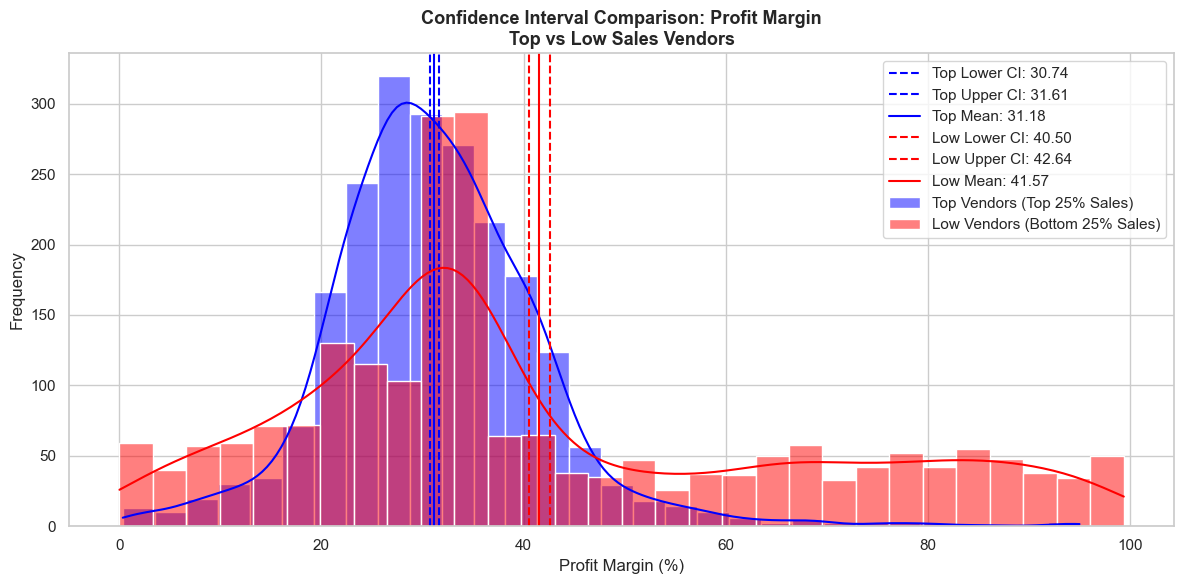

In [42]:
# Compute confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors_profit)
low_mean, low_lower, low_upper = confidence_interval(low_vendors_profit)

# Print confidence interval results
print(
    f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), "
    f"Mean: {top_mean:.2f}"
)

print(
    f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), "
    f"Mean: {low_mean:.2f}"
)

# Create figure
plt.figure(figsize=(12, 6))

# ------------------ Top Vendors Plot ------------------
sns.histplot(
    top_vendors_profit,
    kde=True,
    color="blue",
    bins=30,
    alpha=0.5,
    label="Top Vendors (Top 25% Sales)"
)

plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower CI: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper CI: {top_upper:.2f}")
plt.axvline(top_mean,  color="blue", linestyle="-",  label=f"Top Mean: {top_mean:.2f}")

# ------------------ Low Vendors Plot ------------------
sns.histplot(
    low_vendors_profit,
    kde=True,
    color="red",
    bins=30,
    alpha=0.5,
    label="Low Vendors (Bottom 25% Sales)"
)

plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower CI: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper CI: {low_upper:.2f}")
plt.axvline(low_mean,  color="red", linestyle="-",  label=f"Low Mean: {low_mean:.2f}")

# ------------------ Finalize Plot ------------------
plt.title(
    "Confidence Interval Comparison: Profit Margin\nTop vs Low Sales Vendors",
    fontsize=13,
    fontweight="bold"
)

plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


Vendors with lower sales have higher profit margins (around 40–43%) compared to high-sales vendors (around 31%).

This indicates that selling more does not always mean earning more per unit. Low-sales vendors may be charging premium prices or operating with lower costs.

High-sales vendors can improve profitability by reviewing pricing, reducing costs, or offering bundled deals instead of relying only on volume.

Low-sales vendors, while profitable per unit, may need to increase sales volume through better marketing, competitive pricing, or stronger distribution.

In [43]:
df.to_csv("VendorSalesSummary.csv", index=False)